# Lab 2-b: Regresión.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab2/blob/main/solucion-b.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [1]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



## Análisis Exploratorio.

Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2024-03-19 18:55:31.758158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargar y visualizar los datos.

In [3]:
data = pd.read_csv('dataset-lab2-b.csv')
print(data.head())

         X1        X2         Y
0  0.918500  0.939151  0.872198
1  0.463210  0.357977  0.178228
2  0.466683  0.574127  0.282014
3  0.327067  0.087870  0.076222
4  0.547487  0.863133  0.573703


Plot de los datos.

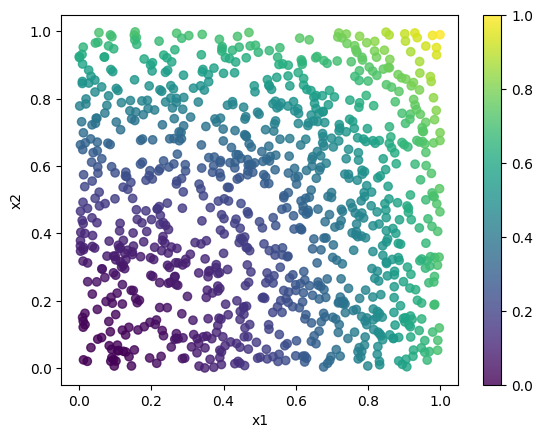

In [4]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

# Plot the data with a color map
plt.scatter(X1, X2, c=Y, cmap='viridis', alpha=0.8)

# Axis labels
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the color bar
plt.colorbar()

plt.show()
plt.show()

Definimos nuestro modelo usando tensorflow.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Definimos una función para plotear la frontera de decisión sobre los datos.

313/313 [==============================] - 1s 3ms/step


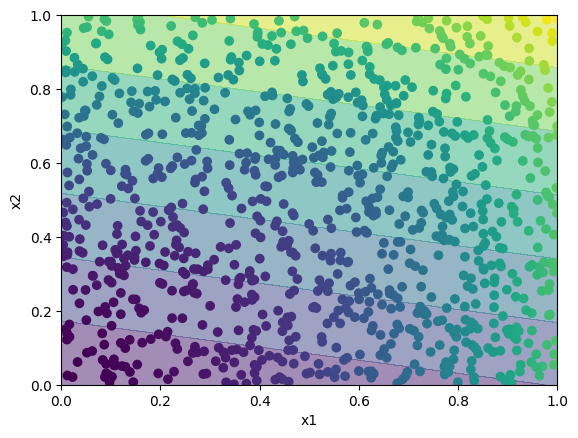

In [6]:
def plot_results(X1, X2, Y, model):

    # Axis labels
    plt.xlabel('x1')
    plt.ylabel('x2')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.5, cmap='viridis')
    # Plot the data with a color map
    plt.scatter(X1, X2, c=Y, cmap='viridis', alpha=1)

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, model)

Entrenamos el modelo.

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse')

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 11/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 12/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 13/50
32/32 [============

Plot de los resultados

313/313 [==============================] - 1s 3ms/step


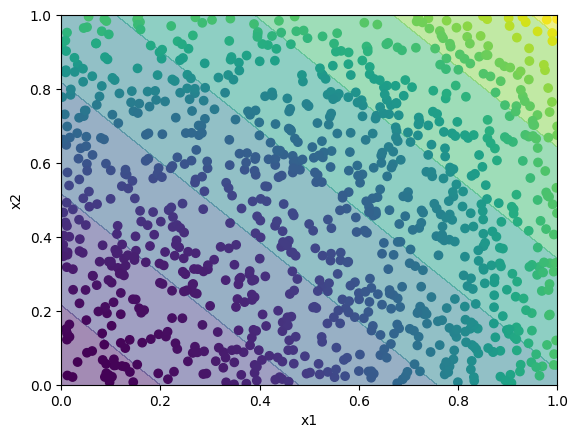

In [8]:
plot_results(X1, X2, Y, model)

Probemos con un modelo más complejo.

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Epoch 1/60


32/32 [==============================] - 1s 4ms/step - loss: 0.0459
Epoch 2/60
32/32 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 3/60
32/32 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 4/60
32/32 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 5/60
32/32 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 6/60
32/32 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 7/60
32/32 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 8/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 9/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 10/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 11/60
32/32 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 12/60
32/32 [==============================] - 0s 7ms/step - loss: 0.0096
Epoch 13/60
32/32 [==============================] - 0s 6ms/

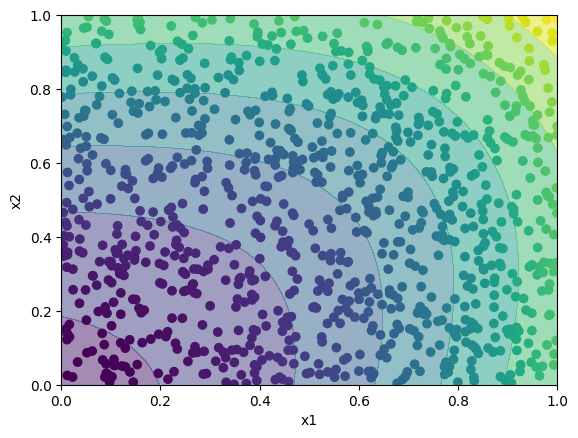

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse')

model.fit(x=x, y=y, epochs=60)

plot_results(X1, X2, Y, model)